# Unit 5 - Financial Planning

In [47]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [48]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [49]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [50]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [51]:
# Fetch current BTC price
# YOUR CODE HERE!
BTC = requests.get(btc_url).json()
BTC_price = BTC["data"]["1"]["quotes"]["CAD"]["price"]
# Fetch current ETH price
# YOUR CODE HERE!
ETH = requests.get(eth_url).json()
ETH_price = ETH["data"]["1027"]["quotes"]["CAD"]["price"]
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc*BTC_price
my_eth_value = my_eth*ETH_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $63935.49
The current value of your 5.3 ETH is $20771.89


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [52]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [53]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_secret ="dp1239dsuohdcsdnkjendkeE9JgNP"
alpaca_api = "PK2340aY60weo0woed0owwW8J"
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api,
    alpaca_secret,
    api_version="v2")

In [58]:
# Format current date as ISO format
# YOUR CODE HERE!
date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
closing_prices = alpaca.get_barset(
    tickers,
    timeframe,
    start = date,
    limit=1000).df
# Preview DataFrame
# YOUR CODE HERE!
closing_prices.head()

AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2020-05-01 00:00:00-04:00  116.97  117.0998  116.6775  116.900  11778582   
2020-05-04 00:00:00-04:00  116.89  117.0900  116.8700  116.975   6950122   
2020-05-05 00:00:00-04:00  116.96  116.9700  116.8100  116.880   7315932   
2020-05-06 00:00:00-04:00  116.44  116.7100  116.3000  116.450   9313368   
2020-05-07 00:00:00-04:00  116.61  116.7600  116.4200  116.730   7338194   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2020-05-01 00:00:00-04:00  285.31  290.6572  281.52  282.73  111321036  
2020-05-04 00:00:00-04:00  280.74  283.9000  279.13  283.66   70199660  
2020-05-05 00:00:00-04:00  286.64  289.2500  285.75  286.22   72232658  
2020-05-06 00:00:00-04:00  288.04  288.4600  283.78  284.29   65371977  
2020-05-07 00:00:00-04:00  287.75  289.7800  287.13  287.70   68883538

In [59]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(closing_prices["AGG"]["close"][0])
spy_close_price = float(closing_prices["SPY"]["close"][0])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.9
Current SPY closing price: $282.73


In [60]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg*agg_close_price
my_spy_value = my_spy*spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $14136.50
The current value of your 200 AGG shares is $23380.00


### Savings Health Analysis

In [61]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE!
savings = [my_btc_value+my_eth_value, my_agg_value+my_spy_value]
# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(savings,columns=["amount"],index=["crypto","shares"])
# Display savings DataFrame
display(df_savings)

,amount
crypto,84707.373278
shares,37516.500000


<AxesSubplot:title={'center':'Savings'}, ylabel='amount'>

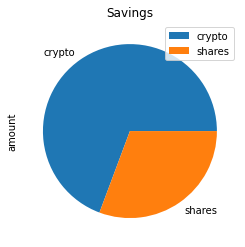

In [62]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount",title="Savings")

In [63]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = df_savings.sum().item()
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congratulations, your emergency fund has enough money!")
elif total_savings == emergency_fund:
    print("Congratulations, you've reached your goal")
else:
    print(emergency_fund - total_savings)

Congratulations, your emergency fund has enough money!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [64]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [65]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    limit=1000).df
# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2018-01-23 00:00:00-05:00  108.33  108.4401  108.29  108.39  3488873  282.74   
2018-01-24 00:00:00-05:00  108.25  108.3200  108.15  108.28  2004492  283.99   
2018-01-25 00:00:00-05:00  108.26  108.5700  108.19  108.56  9339661  284.16   
2018-01-26 00:00:00-05:00  108.51  108.5100  108.27  108.38  2226605  284.27   
2018-01-29 00:00:00-05:00  108.14  108.2100  108.02  108.19  3532887  285.97   

                                                              
                             high      low   close    volume  
time                                                          
2018-01-23 00:00:00-05:00  283.62  282.370  283.26  53406595  
2018-01-24 00:00:00-05:00  284.70  281.840  283.18  77334662  
2018-01-25 00:00:00-05:00  284.27  282.405  283.28  51821059  
2018-01-26 00:00:00-05:00  286.58  283.960  286.57  56613904  
2018-01-29 00:00:00-05:00  286.43  284.500  284.68  60825439

In [71]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30)

In [72]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_30_year.portfolio_data.head()

AGG                                     \
                             open      high     low   close   volume   
time                                                                   
2018-01-23 00:00:00-05:00  108.33  108.4401  108.29  108.39  3488873   
2018-01-24 00:00:00-05:00  108.25  108.3200  108.15  108.28  2004492   
2018-01-25 00:00:00-05:00  108.26  108.5700  108.19  108.56  9339661   
2018-01-26 00:00:00-05:00  108.51  108.5100  108.27  108.38  2226605   
2018-01-29 00:00:00-05:00  108.14  108.2100  108.02  108.19  3532887   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2018-01-23 00:00:00-05:00          NaN  282.74  283.62  282.370  283.26   
2018-01-24 00:00:00-05:00    -0.001015  283.99  284.70  281.840  283.18   
2018-01-25 00:00:00-05:00     0.002586  284.16  284.27  282.405  283.28   
2018-01-26 00:00:00-05:00    -0.001658  284.27  286.58  283.960  286.57   
2018-01-29 00:00:00-05:00    -0.001753  285.97  286.43  284.500  284.68   

                                                  
                             volume daily_return  
time                                              
2018-01-23 00:00:00-05:00  53406595          NaN  
2018-01-24 00:00:00-05:00  77334662    -0.000282  
2018-01-25 00:00:00-05:00  51821059     0.000353  
2018-01-26 00:00:00-05:00  56613904     0.011614  
2018-01-29 00:00:00-05:00  60825439    -0.006595

In [73]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\xjust\fintech\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002909,1.002537,0.999684,0.993252,0.989179,1.005479,0.998529,0.995470,1.008693,0.999788,...,1.004823,1.001949,0.992289,0.995365,1.004286,0.978574,0.988748,1.001628,1.004282,1.005584
2,1.013830,1.005733,1.003616,1.001215,0.989072,1.014672,0.996928,1.000339,1.012583,1.006056,...,1.006123,0.999653,0.993455,1.001075,1.004073,0.987087,1.008240,0.985797,1.004258,1.011653
3,1.012847,1.003295,0.995671,0.986786,0.980754,1.010814,1.003579,0.990541,1.000504,1.006305,...,1.007785,1.000021,0.983653,1.001435,0.997228,0.980371,1.014751,0.971112,1.004028,1.004521
4,1.017119,1.011749,0.989308,0.997267,0.967045,1.012689,1.000130,0.989702,1.004548,1.012657,...,1.002744,1.012535,0.998380,1.006998,0.999876,0.976139,1.034897,0.972890,0.998632,1.012194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.822032,2.904739,7.365595,59.569710,23.726671,10.826625,8.548934,23.624297,21.689371,2.598452,...,16.650519,31.526982,12.235490,26.910814,10.781130,50.294142,5.633490,6.509137,13.191910,9.489074
7557,13.736613,2.902619,7.409918,60.387340,24.101395,10.761452,8.482225,23.732823,21.726301,2.597648,...,16.442985,31.133276,12.286009,27.135483,10.693081,50.493005,5.689461,6.502474,13.224893,9.522588
7558,13.486330,2.918966,7.438859,61.437414,23.902721,10.802190,8.515741,23.744295,21.632930,2.605951,...,16.370118,31.045160,12.172510,26.600045,10.718788,51.035044,5.743238,6.495924,13.204029,9.543575
7559,13.467650,2.930454,7.433982,61.561111,23.852251,10.708919,8.561035,23.663785,21.475377,2.618032,...,16.494754,31.116252,12.340680,26.682054,10.679126,50.782224,5.742544,6.406617,13.244488,9.547267


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

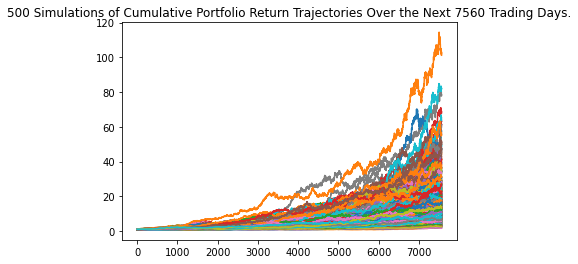

In [74]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_30_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

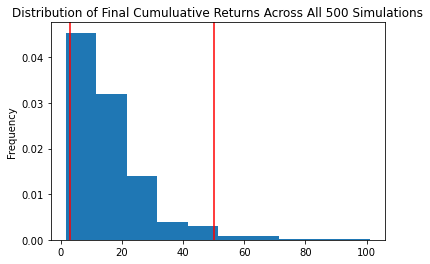

In [75]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_30_year.plot_distribution()

### Retirement Analysis

In [79]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary = MC_30_year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(summary)

count           500.000000
mean             15.997348
std              12.754476
min               1.560897
25%               7.561849
50%              12.404975
75%              20.176397
max             101.191133
95% CI Lower      2.983292
95% CI Upper     50.153737
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [80]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(summary[8] * initial_investment,2)
ci_upper = round(summary[9] * initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $59665.83 and $1003074.73


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [81]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(summary[8] * initial_investment,2)
ci_upper = round(summary[9] * initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $89498.75 and $1504612.1
